In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [10]:
# Starting URL for Weather Map API call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("                             ")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if(i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
                             
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 3 of Set 1 | baicheng
Processing Record 4 of Set 1 | mount gambier
Processing Record 5 of Set 1 | sistranda
Processing Record 6 of Set 1 | isangel
Processing Record 7 of Set 1 | faanui
Processing Record 8 of Set 1 | belaya gora
Processing Record 9 of Set 1 | tuggurt
City not found. Skipping...
Processing Record 10 of Set 1 | tevaitoa
Processing Record 11 of Set 1 | ponta do sol
Processing Record 12 of Set 1 | namwala
Processing Record 13 of Set 1 | yulara
Processing Record 14 of Set 1 | bonavista
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | usinsk
Processing Record 17 of Set 1 | esperance
Processing Record 18 of Set 1 | kavieng
Processing Record 19 of Set 1 | lucmayan
City not found. Skipping...
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | rikitea
P

Processing Record 35 of Set 4 | san cristobal
Processing Record 36 of Set 4 | juneau
Processing Record 37 of Set 4 | qasigiannguit
Processing Record 38 of Set 4 | manokwari
Processing Record 39 of Set 4 | sarkand
Processing Record 40 of Set 4 | marabba
Processing Record 41 of Set 4 | cintalapa
Processing Record 42 of Set 4 | koumac
Processing Record 43 of Set 4 | srednekolymsk
Processing Record 44 of Set 4 | kralendijk
Processing Record 45 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | san andres
Processing Record 48 of Set 4 | namatanai
Processing Record 49 of Set 4 | acapulco
Processing Record 50 of Set 4 | tecoanapa
Processing Record 1 of Set 5 | ostrovnoy
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | linfen
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 5 | tautira
Processing Record 7 of Set 

Processing Record 29 of Set 8 | birzai
Processing Record 30 of Set 8 | maniitsoq
Processing Record 31 of Set 8 | sao filipe
Processing Record 32 of Set 8 | prince rupert
Processing Record 33 of Set 8 | weiser
Processing Record 34 of Set 8 | shakawe
Processing Record 35 of Set 8 | ternate
Processing Record 36 of Set 8 | talara
Processing Record 37 of Set 8 | mugla
Processing Record 38 of Set 8 | zheleznodorozhnyy
Processing Record 39 of Set 8 | muroto
Processing Record 40 of Set 8 | skibbereen
Processing Record 41 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 42 of Set 8 | los llanos de aridane
Processing Record 43 of Set 8 | chumikan
Processing Record 44 of Set 8 | tutoia
Processing Record 45 of Set 8 | saint anthony
Processing Record 46 of Set 8 | portland
Processing Record 47 of Set 8 | przeworsk
Processing Record 48 of Set 8 | athabasca
Processing Record 49 of Set 8 | gunnedah
Processing Record 50 of Set 8 | carballo
Processing Record 1 of Set 9 | constituci

Processing Record 15 of Set 12 | ust-tsilma
Processing Record 16 of Set 12 | orotukan
Processing Record 17 of Set 12 | taoudenni
Processing Record 18 of Set 12 | niquero
Processing Record 19 of Set 12 | muisne
Processing Record 20 of Set 12 | hinton
Processing Record 21 of Set 12 | cherrapunji
Processing Record 22 of Set 12 | road town
Processing Record 23 of Set 12 | asyut
Processing Record 24 of Set 12 | mingguang
Processing Record 25 of Set 12 | necochea
Processing Record 26 of Set 12 | tahe
Processing Record 27 of Set 12 | beira
Processing Record 28 of Set 12 | boende
Processing Record 29 of Set 12 | anadyr
Processing Record 30 of Set 12 | tanabe
Processing Record 31 of Set 12 | axim
Processing Record 32 of Set 12 | guerrero negro
Processing Record 33 of Set 12 | sorland
Processing Record 34 of Set 12 | padang
Processing Record 35 of Set 12 | kudahuvadhoo
Processing Record 36 of Set 12 | madisonville
Processing Record 37 of Set 12 | nemuro
Processing Record 38 of Set 12 | killybegs

In [17]:
# Convert the array of dictionaries to a Pandas Dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,53.26,80,100,1.16,US,2022-04-26 16:15:07
1,Baicheng,45.6167,122.8167,43.99,33,2,14.85,CN,2022-04-26 16:16:10
2,Mount Gambier,-37.8333,140.7667,57.88,90,100,5.41,AU,2022-04-26 16:16:10
3,Sistranda,63.7256,8.8340,40.96,55,87,13.56,NO,2022-04-26 16:16:11
4,Isangel,-19.5500,169.2667,74.66,65,100,12.33,VU,2022-04-26 16:16:11
5,Faanui,-16.4833,-151.7500,81.73,75,13,19.48,PF,2022-04-26 16:16:12
6,Belaya Gora,68.5333,146.4167,4.86,98,100,5.01,RU,2022-04-26 16:12:35
7,Tevaitoa,-16.7833,-151.5000,81.57,76,14,19.95,PF,2022-04-26 16:16:13
8,Ponta Do Sol,32.6667,-17.1000,69.01,64,44,8.37,PT,2022-04-26 16:16:13
9,Namwala,-15.7504,26.4384,73.89,55,92,5.14,ZM,2022-04-26 16:16:14


In [20]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", 
                    "Cloudiness","Wind Speed"]

In [22]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-26 16:15:07,42.6001,-73.9662,53.26,80,100,1.16
1,Baicheng,CN,2022-04-26 16:16:10,45.6167,122.8167,43.99,33,2,14.85
2,Mount Gambier,AU,2022-04-26 16:16:10,-37.8333,140.7667,57.88,90,100,5.41
3,Sistranda,NO,2022-04-26 16:16:11,63.7256,8.8340,40.96,55,87,13.56
4,Isangel,VU,2022-04-26 16:16:11,-19.5500,169.2667,74.66,65,100,12.33
5,Faanui,PF,2022-04-26 16:16:12,-16.4833,-151.7500,81.73,75,13,19.48
6,Belaya Gora,RU,2022-04-26 16:12:35,68.5333,146.4167,4.86,98,100,5.01
7,Tevaitoa,PF,2022-04-26 16:16:13,-16.7833,-151.5000,81.57,76,14,19.95
8,Ponta Do Sol,PT,2022-04-26 16:16:13,32.6667,-17.1000,69.01,64,44,8.37
9,Namwala,ZM,2022-04-26 16:16:14,-15.7504,26.4384,73.89,55,92,5.14


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

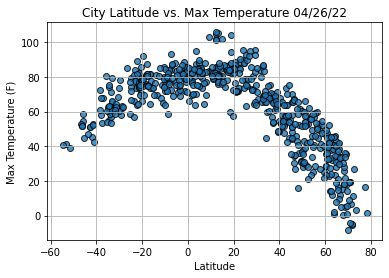

In [27]:
# Import time moduel.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

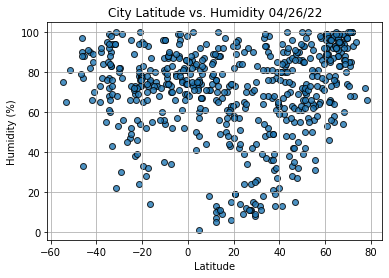

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

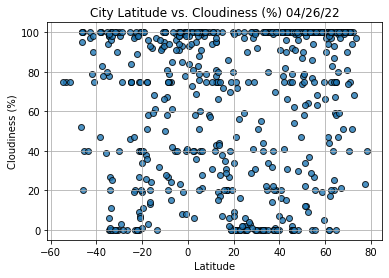

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

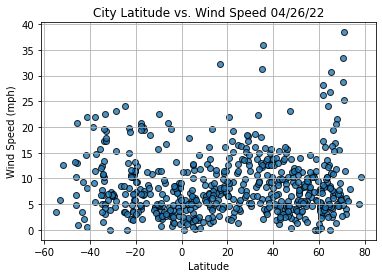

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()